In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [7]:
df=pd.read_csv("")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [40]:
df["Age"].value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64

In [22]:
df["Gender"]

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

In [23]:
le_sex=preprocessing.LabelEncoder()
le_sex.fit(['Male','Female'])
df["Gender"]=le_sex.transform(df["Gender"])



In [26]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [52]:
df[1:]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1
5,6,0,22,17,76,1
...,...,...,...,...,...,...
195,196,0,35,120,79,0
196,197,0,45,126,28,2
197,198,1,32,126,74,0
198,199,1,32,137,18,2


In [54]:
from sklearn.preprocessing import StandardScaler
X=df.values[:,1:]

Clus_dataSet=StandardScaler().fit_transform(X)
Clus_dataSet


array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148,  0.00805849],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407,  0.00805849],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298,  0.00805849],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783,  0.00805849],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992,  0.00805849],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627,  0.00805849],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298,  0.00805849],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436,  0.00805849],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767,  0.00805849],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002,  0.00805849],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ,  0.00805849],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216,  0.00805849],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894,  0.00805849],
       [-0.88640526, -1.06573534, -1.5

In [44]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [42]:
k_means=KMeans(init="k-means++", n_clusters=4,n_init=12)
k_means.fit(X)
labels=k_means.labels_
print(labels)

[3 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 3 2 2 2 3 2 2 3 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [36]:
df["Clus"]=labels
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1


/tmp/ipykernel_12715/2441069439.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:,1],X[:,2],s=area,c=labels.astype(np.float),alpha=0.5)


<function matplotlib.pyplot.show(close=None, block=None)>

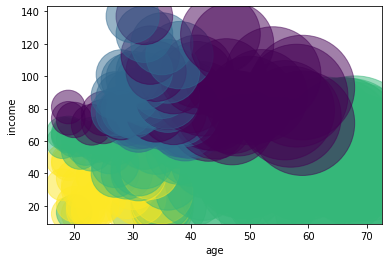

In [47]:
area=np.pi*(X[:,1])**2
plt.scatter(X[:,1],X[:,2],s=area,c=labels.astype(np.float),alpha=0.5)
plt.xlabel("age")
plt.ylabel("income")
plt.show


In [50]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1


In [51]:
featureset=df[["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]

In [58]:
from sklearn.preprocessing import MinMaxScaler
X=featureset.values
mtx=MinMaxScaler()
feature_mtx=mtx.fit_transform(X)
feature_mtx[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918]])

In [64]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster import hierarchy 
dist_matrix=euclidean_distances(feature_mtx,feature_mtx)
print(dist_matrix)

[[0.         0.43029381 1.05538015 ... 1.00888686 1.0528145  1.11639204]
 [0.43029381 0.         1.25941672 ... 0.93683095 1.20748243 1.01507247]
 [1.05538015 1.25941672 0.         ... 1.53221213 1.43245312 1.62419301]
 ...
 [1.00888686 0.93683095 1.53221213 ... 0.         0.57849818 0.13432353]
 [1.0528145  1.20748243 1.43245312 ... 0.57849818 0.         0.66437953]
 [1.11639204 1.01507247 1.62419301 ... 0.13432353 0.66437953 0.        ]]


In [65]:
X_using_dist_matrix=hierarchy.linkage(dist_matrix,"complete")

/tmp/ipykernel_12715/1392773804.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X_using_dist_matrix=hierarchy.linkage(dist_matrix,"complete")


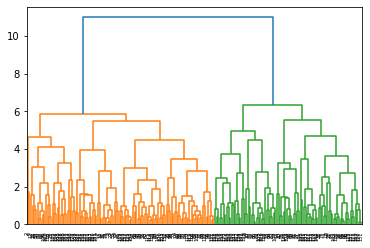

In [66]:
dendro = hierarchy.dendrogram(X_using_dist_matrix)

In [67]:
df.head(1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus
0,1,1,19,15,39,1


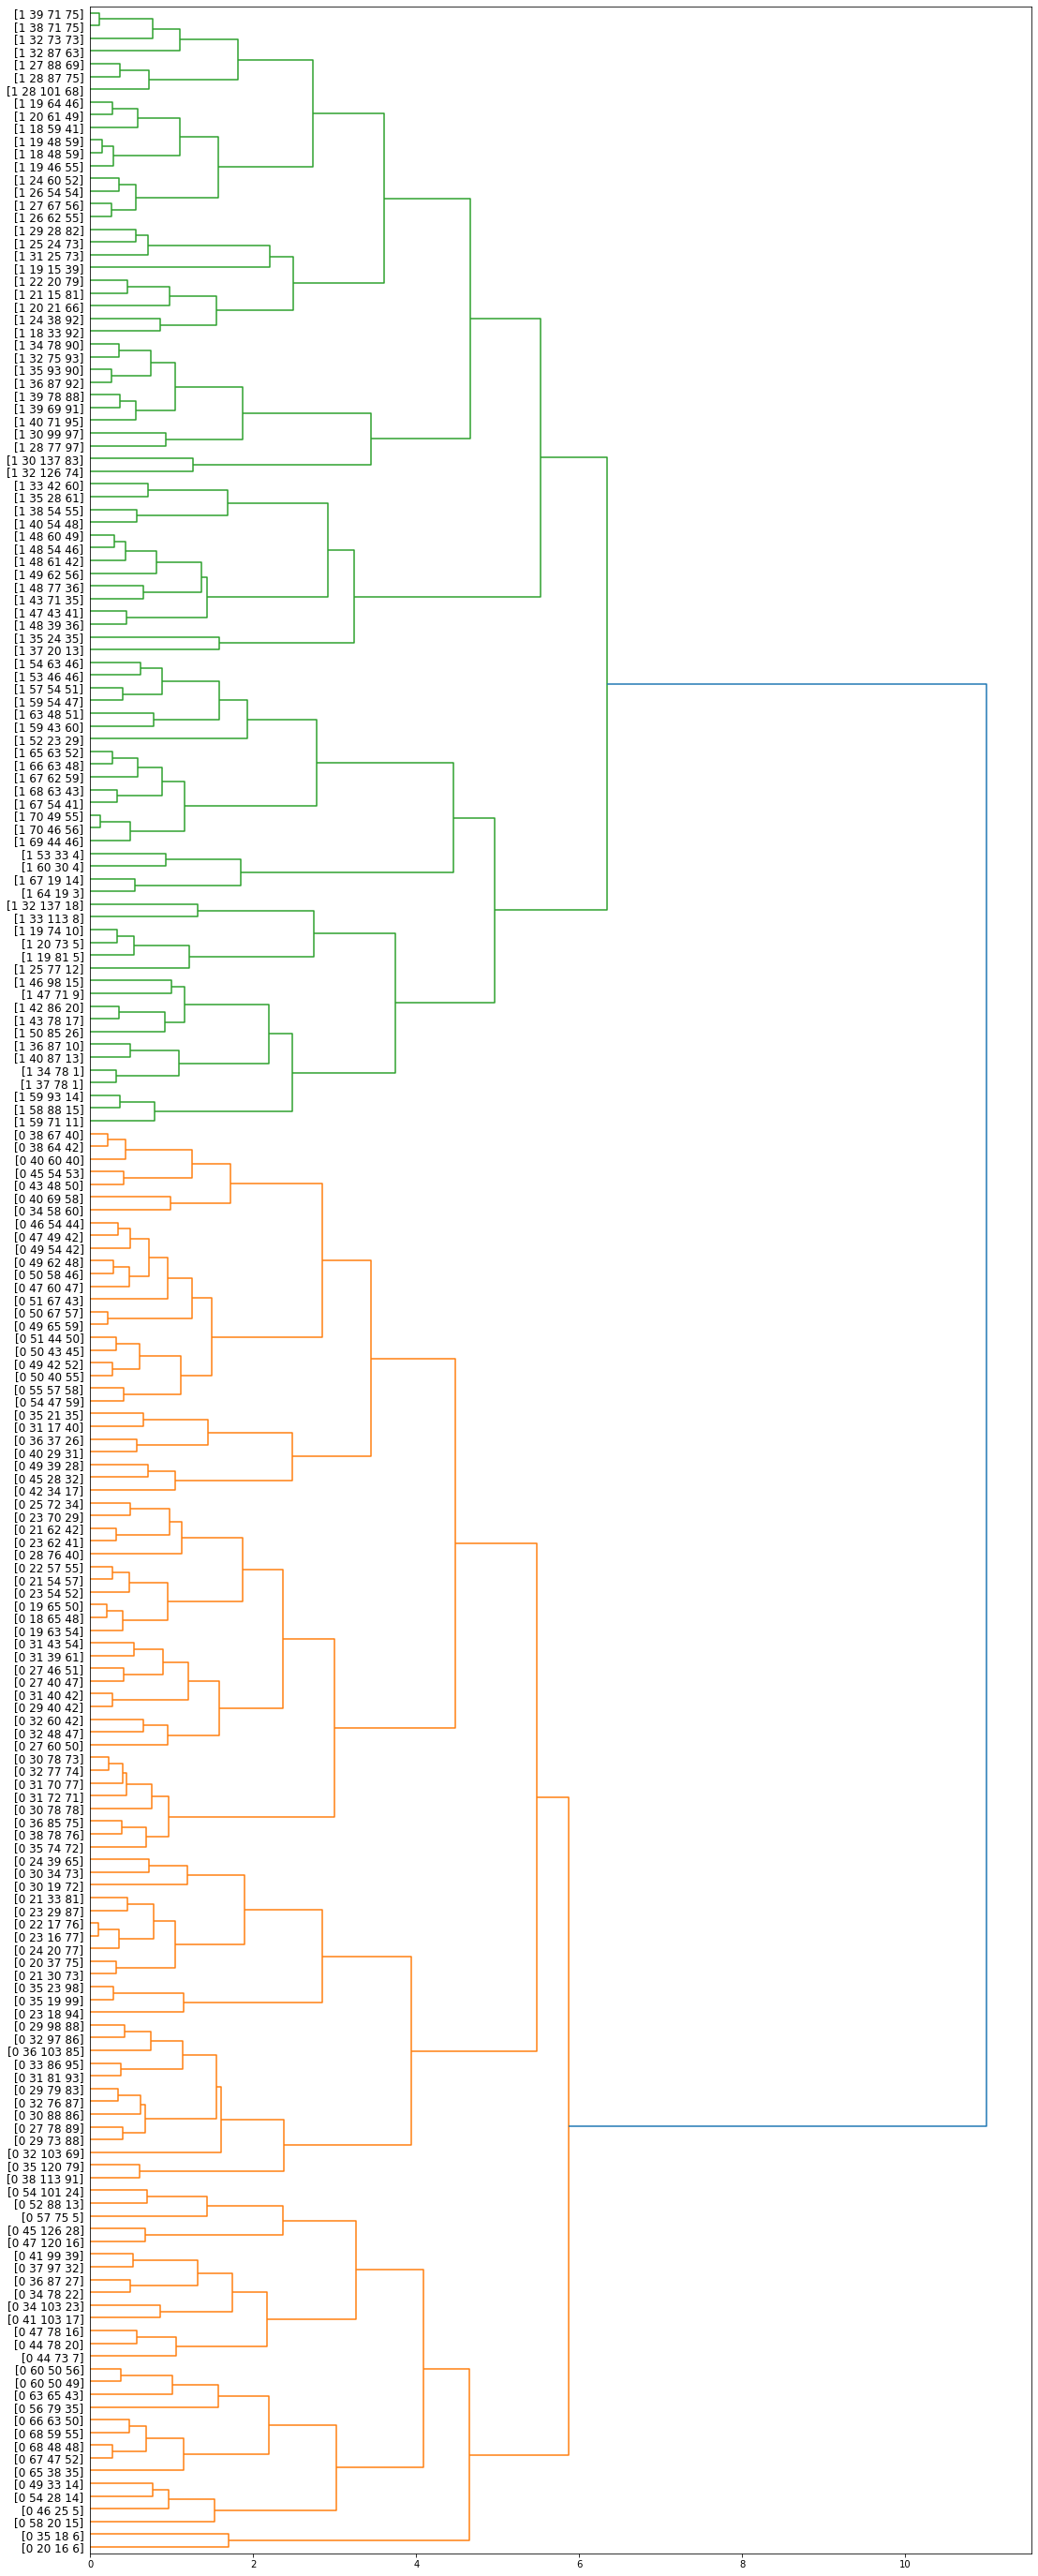

In [72]:
import pylab
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s %s]' % (df['Gender'][id],df['Age'][id],df['Annual Income (k$)'][id],df["Spending Score (1-100)"][id]) 
    
dendro = hierarchy.dendrogram(X_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [73]:
from sklearn.cluster import DBSCAN

In [98]:
df.values[:,4]

array([39, 81,  6, 77, 40, 76,  6, 94,  3, 72, 14, 99, 15, 77, 13, 79, 35,
       66, 29, 98, 35, 73,  5, 73, 14, 82, 32, 61, 31, 87,  4, 73,  4, 92,
       14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52,
       60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48,
       59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57,
       46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48,
       59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42, 46, 48, 50, 43, 59, 43,
       57, 56, 40, 58, 91, 29, 77, 35, 95, 11, 75,  9, 75, 34, 71,  5, 88,
        7, 73, 10, 72,  5, 93, 40, 87, 12, 97, 36, 74, 22, 90, 17, 88, 20,
       76, 16, 89,  1, 78,  1, 73, 35, 83,  5, 93, 26, 75, 20, 95, 27, 63,
       13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32, 86, 15, 88, 39, 97, 24,
       68, 17, 85, 23, 69,  8, 91, 16, 79, 28, 74, 18, 83])

In [119]:
df=df.drop("Clus",axis=1)
S=df.values[:,2:7]
S

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [121]:
from sklearn.preprocessing import MinMaxScaler
X=featureset.values
mtx=MinMaxScaler()
feature_mtx=mtx.fit_transform(S)
feature_mtx[0:5]

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918]])

In [122]:
epsilon=0.3
minimumSamp=6
db=DBSCAN(eps=epsilon,min_samples=minimumSamp).fit(feature_mtx)
labels=db.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [123]:
n_clusters_=len(set(labels))-(1 if -1 in labels else 0)
n_clusters_

1

In [124]:
unique_labels = set(labels)
unique_labels

{0}

In [125]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

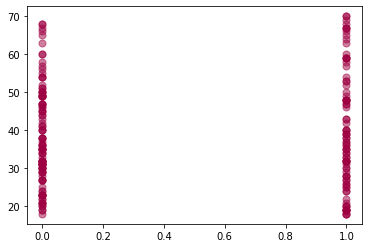

In [126]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'

    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)